### API cookbok illustrisTNG

In [1]:
import requests
import pandas as pd
import h5py
import csv
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def get(path, params=None):
     # make HTTP GET requewest to path
    headers = {"api-key":"6a9c0ccbe17b0c662f97460749f3c13f"}
    r = requests.get(path, params=params, headers=headers)

     # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()
        
    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
             f.write(r.content)
        return filename # return the filename string
    
    return r

### Min mass of SMBH 

In [3]:

mass_min =10**5/1e10*0.6774


### Search querry string

In [4]:

search_query = "?mass_bhs__gt=" + str(mass_min)
search_query 


'?mass_bhs__gt=6.774000000000001e-06'

### Here I am saving all bh_mass > mass_min(for SMBH condition as mentioned above) subhalo ids of each snapshots in csv format

In [6]:
baseurl = "http://www.tng-project.org/api/TNG100-1/snapshots/"# + search_query
base = get(baseurl)
base =pd.DataFrame(base) 
num = base["number"]
print(num)
# for i in range(num):
#     url = "http://www.tng-project.org/api/TNG100-1/snapshots/"+ str(99) + "/subhalos" + search_query
#     count = get(url)['count']
#     SMBH = get(url,{'limit': count})
#     df_i = pd.DataFrame(SMBH['results'])
#     df_i.index.names = ['counts']    
#     df_i.to_csv('/home/draco/padua/computational astro/TNG100-1/snaps/smbh_snap_id' + str(99) + '.csv')





0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Name: number, Length: 100, dtype: int64


In [7]:
SMBH_num = []
for i in num:
    url = "http://www.tng-project.org/api/TNG100-1/snapshots/"+ str(i) + "/subhalos" + search_query
    count = get(url)['count']
    SMBH_num.append(count)
# print(SMBH_num)    


        

Text(0, 0.5, 'Number of SMBH')

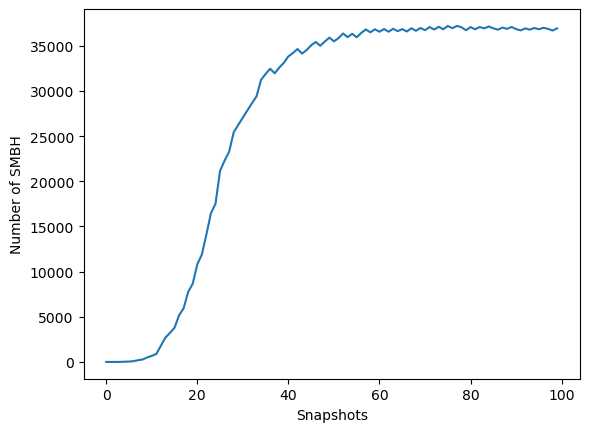

In [8]:
plt.plot(SMBH_num)
plt.xlabel("Snapshots")
plt.ylabel("Number of SMBH")

In [216]:
url = "http://www.tng-project.org/api/TNG100-1/snapshots/"+ str(4) + "/subhalos" + search_query
params = {'bhs':'all'}
count = get(url)['count']
SMBH = get(url,{'limit': count})
print(count)
# print(SMBH['results'][150:170])
# ids = [SMBH['results'][i][ "id"] for i in range(count)]
subkeys = list(get(SMBH['results'][0]['url']).keys())
subvalues = list(get(SMBH['results'][0]['url']).values())
# # dict1 = dict(zip(subkeys, subvalues))

df = pd.DataFrame(data=subvalues,index = subkeys).transpose()

df

23


,snap,id,bhmdot,cm_x,cm_y,cm_z,gasmetallicity,gasmetallicityhalfrad,gasmetallicitymaxrad,gasmetallicitysfr,...,parent,grnr,primary_flag,mass_log_msun,related,cutouts,trees,supplementary_data,vis,meta
0,4,0,0.000174,20868.2,48197.6,26524.4,0.002967,0.003841,0.001385,0.001283,...,0,0,1,11.143154,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...


In [217]:
for i in range(1,count):
    subvalues1 = get(SMBH['results'][i]['url']).values()
    df_i = pd.DataFrame(data=subvalues1,index = subkeys).transpose()
    df = pd.concat([df,df_i])



In [218]:
df

,snap,id,bhmdot,cm_x,cm_y,cm_z,gasmetallicity,gasmetallicityhalfrad,gasmetallicitymaxrad,gasmetallicitysfr,...,parent,grnr,primary_flag,mass_log_msun,related,cutouts,trees,supplementary_data,vis,meta
0,4,0,0.000174,20868.2,48197.6,26524.4,0.002967,0.003841,0.001385,0.001283,...,0,0,1,11.143154,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...
0,4,25,0.0,10943.0,28988.6,72486.5,0.000871,0.001788,0.000968,0.000807,...,0,1,1,10.942037,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...
0,4,55,0.000303,54442.1,72111.2,14381.2,0.002357,0.003226,0.001445,0.001399,...,0,2,1,11.093051,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...
0,4,68,0.000144,12921.0,3726.94,35851.2,0.001855,0.002648,0.001902,0.001287,...,0,3,1,11.027731,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...
0,4,76,0.00013,52757.6,74655.3,11770.2,0.004343,0.005518,0.003537,0.002091,...,0,4,1,10.961554,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...
0,4,86,0.000064,27870.8,45806.5,44355.8,0.00117,0.001834,0.000813,0.000735,...,0,5,1,10.796987,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...
0,4,106,0.000123,52007.7,70452.7,41903.1,0.005214,0.0069,0.001816,0.002239,...,0,6,1,10.948224,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...
0,4,111,0.00005,32854.1,1211.9,74662.3,0.00157,0.002356,0.00147,0.00102,...,0,7,1,10.786597,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...
0,4,130,0.000054,45649.5,73800.9,44084.0,0.001402,0.002013,0.001402,0.001171,...,0,8,1,10.799449,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...
0,4,137,0.000047,52587.8,10566.3,34559.6,0.001551,0.002249,0.001215,0.000945,...,0,9,1,10.822296,{'sublink_progenitor': 'http://www.tng-project...,{'subhalo': 'http://www.tng-project.org/api/TN...,{'sublink': 'http://www.tng-project.org/api/TN...,{},{'mergertree_sublink': 'http://www.tng-project...,{'url': 'http://www.tng-project.org/api/TNG100...


In [219]:
df.to_csv('/home/draco/padua/computational astro/TNG100-1/snaps/smbh_snap_results' + str(4) + '.csv')